In [1]:
# word embedding for korean
import collections
import string
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
matplotlib.rc('font',family='NanumGothic')

print ("package loaded")

package loaded


In [19]:
# Hangul Tokenizer (Konlpy - Kkma)
from konlpy.tag import Kkma
kkma = Kkma()

def pprint(list_text):
    pstr = "[" + ','.join(list_text) + "]"
    print pstr

def tokenizer(phrase):    
    return [unicode(tup[0]) for tup in kkma.pos(phrase)]

pprint(tokenizer(u'이것은 한국어를 처리하기 위한 추상 도구 입니다. 정말 잘 만들었습니다.'))

[이것,은,한국어,를,처리,하,기,위하,ㄴ,추상,도구,이,ㅂ니다,.,정말,잘,만들,었,습니다,.]


In [20]:
# Load corpus
f_corp= open('testtxt/drill_man.txt')
content = f_corp.read()

exclude = set(string.punctuation)
content_punc_removed = ''.join(ch for ch in content if ch not in exclude)
sentences = content_punc_removed.split('\n')
sentences = map(lambda stnc : unicode(stnc.decode('utf-8')), sentences)

print ("number of origin lines : " + str(len(sentences)))

number of origin lines : 895


In [21]:
# list of all words
words = ""
for stnc in sentences:
    tokens = tokenizer(stnc)
    words += " ".join(tokens)
words = words.split()

print ("size of words : " +  str(len(words)))

size of words : 67386


In [22]:
pprint(words)

[대학,문예,창작,과,특강,을,위하,어,대전,에,내려가,ㄴ,건,일주일,전,일,이,었,다,구월,초순,이,ㄴ데,어째,한,여름,보다,날,이,찌,는,듯하,었,다,중부,고속도로,를,달리,어서,경기도,일,죽,쯤,가,었,을,때,부터,자동차,에어컨,은,기력,이,다하,어서,아무리,세,게,튿,어도,미지근,하,ㄴ,바람,만,내뿜,기,시작,하,었,다,게다가,전날,밤,에,늦,도록,마시,ㄴ,술,때문,에,여느,때,에는,만만,하,게,여기,었,더,ㄴ,거리,의,여행,이,그렇,게,고되,ㄹ,수,없,었,다어쨌든,시간,이,라는,건,시계,를,거꾸로,매달,거나,서랍,에,넣,고,자물쇠,를,채우,어도,제꺽,제꺽,흘러가,게,마련,이,어서,이,를,악물,고,버티,ㄴ,결과,핸들,에,얼굴,을,묻,고,졸도,하,는,일,없이,무사히,대전,에,도착,하,ㄹ,수,있,었,다,특강,을,시작,하,ㄹ,때,까,지,는,아직,시간,이,남,아,있,었,다,국물,이,시원,하,ㄴ,음식,을,먹,으면,속이,좀,풀리,ㄹ,것,같,아서,차,에서,내리,어,교문,을,지나,언덕을,넘,었,다,왼쪽,어느,식당,유리창,에,내가,찾,더,ㄴ,음식,이름,이,적히,어,있,었,다,콩나물,해장국그,집,에,는,대여섯,사람,이,모이,어,앉,아서,밥,대신,에,한담,을,나누,고,있,었,다,주인,여자,를,집사,님,하,고,부르,는,것,으로,보,아서,지나,는,길,에,잠깐,들르,ㄴ,교인,들,이,었,다,머리,에,포마드,를,잔뜩,발르,아,가르마,를,타,ㄴ,사내,는,전도사,이,었,다,교인,가운데,그런,머리,모양,에,흰색,와이셔츠,를,입,은,자,는,전도,사일,가능성,이,크,다고,보,는,게,내,오래,ㄴ,고정관념,이,었,다어리,었,을,때,나도,노랗,고,파랗,ㄴ,물감,을,들이,ㄴ,달걀,과,갖가지,과자,를,얻어먹,는,재미,에,부활절,과,성탄절,을,앞뒤,로,하,어서,교회,에,들락거리,ㄴ,적이,있,었,다,밥집,에서,한담,을,이끌,고,있,는,사내,는,그,시절,의,유년,주일,학교,전도사,와,생김새,뿐,아니,라,말투,까지,판,에,박,은,듯하,었,다,말하,는,중간,중간,에,앞,에,놓이,ㄴ,성경책,에,눈길,을,주,며

In [24]:
# count words
count = collections.Counter(words).most_common()
print ("count list size : " + str(len(count)))
print ("Top 5 words are below")
for tup in count[:5]:
    print(tup[0] + " : " + str(tup[1]))

count list size : 7307
Top 5 words are below
는 : 2358
었 : 2343
을 : 2337
이 : 2272
ㄴ : 1992


In [25]:
# make dictionary
rdic = [i[0] for i in count]
dic = {w : i for i, w in enumerate(rdic)}
dic_size = len(dic)
print ('dictionary size : ' + str(dic_size))

dictionary size : 7307


In [26]:
pprint (rdic)

[는,었,을,이,ㄴ,하,에,다,고,를,가,은,의,어,으로,있,에서,여자,게,았,나,로,것,ㄹ,그,지,아,도,들,더,습니다,어서,며,과,와,ㄴ다,되,기,일,않,보,집,없,때,한,내,사람,삼촌,면서,서,두,저,자,수,손,그녀,오,아서,벽,얼굴,눈,에게,아니,다가,아이,뒤,같,면,어요,길,다는,방,까지,날,소리,앞,속,앉,처럼,주,보이,는데,지요,만,자신,겠,한테,알,당신,살,년,으며,사내,다시,어느,말,듣,들어가,안,부터,입,전,아내,쓰,곽,형,여,자리,열,위,시,얘기,여선생,몸,말하,나오,다른,시간,생각,그러,다고,지만,건,받,라고,바라보,ㄴ지,때문,지금,놓,고개,지나,먹,대하,만들,보다,몇,느낌,하나,동안,못하,내가,ㅂ니다,모르,거,대,가방,우리,차,발,세상,소설,만나,자기,묻,라는,내리,머리,시작,사랑,솜다리,듯이,없이,라,그렇,먼지,문,어떤,순간,물,계속,돌아오,쪽,대로,번,듯하,형수,그때,더니,그날,짐,사이,바람,는지,나가,니,잘,이나,들어오,결혼,거나,많,크,처음,향하,옆,스,목소리,싶,사실,버스,보내,걷,좋,통하,여기,모든,뿐,경우,어도,데,무릎,밖,사,같이,곳,뜨,통과,갈,바닥,저수지,달,짓,이후,모두,개,작가,남자,이야기,달리,후,마음,아침,하지만,창,떠나,사라지,러,쳐다보,죠,표정,잠,햇살,사나이,중,어야,야,주위,모습,다리,버리,또,ㄴ다는,웃,가지,는데요,아무,다그,꿈,밤,마치,올라가,으면,전혀,돌아가,글,느끼,이런,무슨,기에,벌어지,나타나,새,마다,ㄹ까,네,누구,어떻,요,걸치,지내,채,바로,떨어지,ㅁ,음식,냄새,십,가슴,하늘,늘,불,바이러스,생기,마시,생활,어디,눕,전화,마당,그리,역시,나누,소설가,잡,다음,멈추,해,중간,돌,올리,한번,나이,세,내용,둘,맞,떠오르,갖,찾,멀,옮기,잠깐,적,가운데,술,작품,서로,밑,좀,별,ㄴ가,덜,이미,돌아보,치,시절,거실,들리,일어나,부르,ㄹ지,닿,타,변하,님,사진,려,어깨,터,자세,정도,있다,손가락,이렇,등,뭐,남,발표,그곳,삼,기사,들려주,다섯,많이,낮,잠들,여러,어렵,더군요,드러내,오늘,적이,고자,들어서

In [27]:
data = [dic[word] for word in words]
print ("size of data : " + str(len(data)))
print ("sample data : " + str(data[:10]))

size of data : 67386
sample data : [1351, 1709, 705, 33, 2656, 2, 457, 13, 2552, 6]


In [28]:
# Word embedding options
window_size = 3
embedding_size = 2
batch_size = 100
learning_rate = 0.01
negative_sample = 100
training_epoch = 10000

In [32]:
# make skip grammer pairs
skip_gram_data = []
for sentence in sentences:
    words = tokenizer(sentence)
    for i, word in enumerate(words):
        for w in range(-window_size, window_size):
            if i + w >= 0 and i + w < len(words) and w != 0 :
                print word
                skip_gram_data.append([dic[word] , dic[words[i + w]]])

print ('skip gram pairs : ' + str(skip_gram_data [:5]))

대학
대학
문예
문예
문예
창작
창작
창작
창작
과
과
과
과
과
특강
특강
특강
특강
특강
을
을
을
을
을
위하
위하
위하
위하
위하
어
어
어
어
어
대전
대전
대전
대전
대전
에
에
에
에
에
내려가
내려가
내려가
내려가
내려가
ㄴ
ㄴ
ㄴ
ㄴ
ㄴ
건
건
건
건
건
일주일
일주일
일주일
일주일
일주일
전
전
전
전
전
일
일
일
일
일
이
이
이
이
이
었
었
었
었
었
다
다
다
다
다
구월
구월
구월
구월
구월
초순
초순
초순
초순
초순
이
이
이
이
이
ㄴ데
ㄴ데
ㄴ데
ㄴ데
ㄴ데
어째
어째
어째
어째
어째
한
한
한
한
한
여름
여름
여름
여름
여름
보다
보다
보다
보다
보다
날
날
날
날
날
이
이
이
이
이
찌
찌
찌
찌
찌
는
는
는
는
는
듯하
듯하
듯하
듯하
듯하
었
었
었
었
었
다
다
다
다
다
중부
중부
중부
중부
중부
고속도로
고속도로
고속도로
고속도로
고속도로
를
를
를
를
를
달리
달리
달리
달리
달리
어서
어서
어서
어서
어서
경기도
경기도
경기도
경기도
경기도
일
일
일
일
일
죽
죽
죽
죽
죽
쯤
쯤
쯤
쯤
쯤
가
가
가
가
가
었
었
었
었
었
을
을
을
을
을
때
때
때
때
때
부터
부터
부터
부터
부터
자동차
자동차
자동차
자동차
자동차
에어컨
에어컨
에어컨
에어컨
에어컨
은
은
은
은
은
기력
기력
기력
기력
기력
이
이
이
이
이
다하
다하
다하
다하
다하
어서
어서
어서
어서
어서
아무리
아무리
아무리
아무리
아무리
세
세
세
세
세
게
게
게
게
게
튿
튿
튿
튿
튿
어도
어도
어도
어도
어도
미지근
미지근
미지근
미지근
미지근
하
하
하
하
하
ㄴ
ㄴ
ㄴ
ㄴ
ㄴ
바람
바람
바람
바람
바람
만
만
만
만
만
내뿜
내뿜
내뿜
내뿜
내뿜
기
기
기
기
기
시작
시작
시작
시작
시작
하
하
하
하
하
었
었
었
었
었
다
다
다
다
다
게다가
게다가
게다가
게다가
게다가
전날
전날
전날
전날
전날
밤
밤
밤
밤
밤
에
에
에
에
에
늦
늦
늦
늦
늦
도록
도록
도록
도록
도록
마시
마시
마시
마시
마시
ㄴ
ㄴ
ㄴ
ㄴ


KeyError: u'\ub2e4\uba74\uc11c\uc694'

In [14]:
def random_batch(skip_gram_pairs, batch_size):
    x = []
    y = []
    r = np.random.choice(range(len(skip_gram_pairs)), batch_size, replace=False)
    for idx in r :
        x.append(skip_gram_pairs[idx][0])
        y.append([skip_gram_pairs[idx][1]])
    return x, y

print ("random batch : " + str(random_batch(skip_gram_data, 5)))

random batch : ([35, 16, 504, 4102, 1684], [[2878], [11778], [21], [13748], [1262]])


In [15]:
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

embeddings = tf.Variable(tf.random_uniform([dic_size, embedding_size], -1.0, 1.0))
embed = tf.nn.embedding_lookup(embeddings, train_inputs) # lookup table

# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([dic_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([dic_size]))

# Compute the average NCE loss for the batch.
cost = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, embed, train_labels, negative_sample, dic_size))

# Use the adam optimizer
optm = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.initialize_all_variables()

print ("Graph build")

Graph build


In [16]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epoch):
    batch_inputs, batch_labels = random_batch(skip_gram_data, batch_size)
    cost_val, _ = sess.run([cost, optm],feed_dict={train_inputs: batch_inputs, train_labels: batch_labels})
    if epoch % 500 == 0:
        print ("epoch: %03d/%03d  ,  cost: %.6f" % (epoch, training_epoch, cost_val))

trained_embeddings = sess.run(embeddings)
print ("Training complete")

epoch: 000/10000  ,  cost: 334.738953
epoch: 500/10000  ,  cost: 286.517944
epoch: 1000/10000  ,  cost: 175.172485
epoch: 1500/10000  ,  cost: 96.072983
epoch: 2000/10000  ,  cost: 85.301552
epoch: 2500/10000  ,  cost: 74.525688
epoch: 3000/10000  ,  cost: 43.643467
epoch: 3500/10000  ,  cost: 35.839096
epoch: 4000/10000  ,  cost: 26.546471
epoch: 4500/10000  ,  cost: 20.362551
epoch: 5000/10000  ,  cost: 46.990730
epoch: 5500/10000  ,  cost: 15.218434
epoch: 6000/10000  ,  cost: 13.075096
epoch: 6500/10000  ,  cost: 17.938730
epoch: 7000/10000  ,  cost: 8.006881
epoch: 7500/10000  ,  cost: 8.175989
epoch: 8000/10000  ,  cost: 9.172287
epoch: 8500/10000  ,  cost: 6.295805
epoch: 9000/10000  ,  cost: 9.873281
epoch: 9500/10000  ,  cost: 6.946042
Training complete


In [17]:
print (trained_embeddings.shape)

(14736, 2)


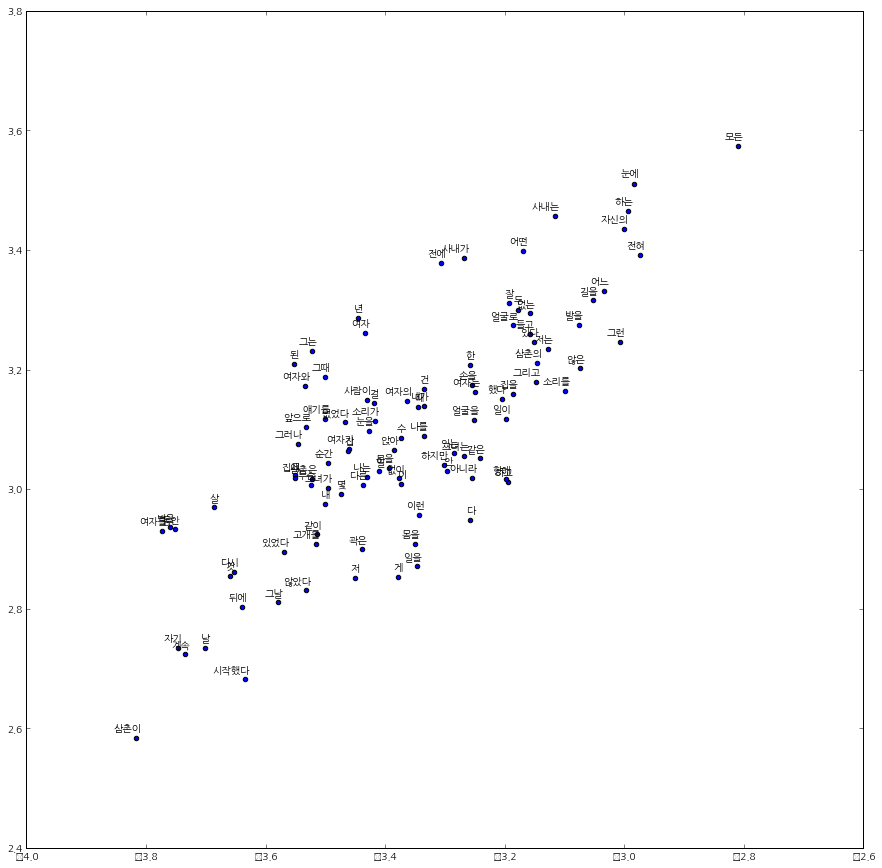

In [24]:
# Show word2vec if dim is 2
plt.figure(figsize=(15,15))
if trained_embeddings.shape[1] == 2:
    labels = rdic[:100] # Show top 100 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate('%s' % label.decode('UTF-8'), xy=(x, y), xytext=(5, 5), textcoords='offset points', ha='right', va='bottom')
    plt.show()